In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('X_ray_data')

Drive already mounted at X_ray_data; to attempt to forcibly remount, call drive.mount("X_ray_data", force_remount=True).


In [ ]:
# rm -r sample_data

In [ ]:
!ls -la

total 1407288
drwxr-xr-x 1 root root      4096 Sep 12 18:01 .
drwxr-xr-x 1 root root      4096 Sep 12 15:03 ..
drwxr-xr-x 4 root root      4096 Sep  1 19:26 .config
drwxr-xr-x 2 root root      4096 Sep 12 17:18 .ipynb_checkpoints
-rw-r--r-- 1 root root 144095752 Sep 12 17:21 model_epoch_01_loss_0.65_acc_0.28_val_acc_0.27_.h5
-rw-r--r-- 1 root root 144095752 Sep 12 17:23 model_epoch_03_loss_0.56_acc_0.33_val_acc_0.39_.h5
-rw-r--r-- 1 root root 144095752 Sep 12 17:24 model_epoch_04_loss_0.56_acc_0.37_val_acc_0.42_.h5
-rw-r--r-- 1 root root 144095752 Sep 12 17:25 model_epoch_05_loss_0.54_acc_0.41_val_acc_0.50_.h5
-rw-r--r-- 1 root root 144095752 Sep 12 17:29 model_epoch_09_loss_0.48_acc_0.51_val_acc_0.56_.h5
-rw-r--r-- 1 root root 144095752 Sep 12 17:30 model_epoch_10_loss_0.49_acc_0.49_val_acc_0.59_.h5
-rw-r--r-- 1 root root 144095752 Sep 12 17:31 model_epoch_11_loss_0.48_acc_0.50_val_acc_0.61_.h5
-rw-r--r-- 1 root root 144095752 Sep 12 17:34 model_epoch_14_loss_0.46_acc_0.54_val_acc_0.6

In [ ]:
# !ls -la

In [ ]:
# !unzip Dataset_4_classe_second_approach.zip

In [ ]:
import pandas as pd
import os
import shutil
import sys
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
import tensorflow

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
path_data = '/content/X_ray_data/MyDrive/X-ray_data/Data_augmented_4_classes_train_test_val'

In [ ]:
Train_NORMAL = os.listdir(path_data+'/Train/NORMAL/')
print('Train_NORMAL = ', len(Train_NORMAL))

Train_Pneumocystis = os.listdir(path_data+'/Train/Pneumocystis/')
print('Train_Pneumocystis = ', len(Train_Pneumocystis))

Train_Streptococcus = os.listdir(path_data+'/Train/Streptococcus/')
print('Train_Streptococcus = ', len(Train_Streptococcus))

Train_Covid = os.listdir(path_data+'/Train/COVID/')
print('Train_Covid = ', len(Train_Covid))

Train_NORMAL =  497
Train_Pneumocystis =  488
Train_Streptococcus =  475
Train_Covid =  465


In [ ]:
Val_NORMAL = os.listdir(path_data+'/val/NORMAL/')
print('Val_NORMAL = ', len(Val_NORMAL))

Val_Pneumocystis = os.listdir(path_data+'/val/Pneumocystis/')
print('Val_Pneumocystis = ', len(Val_Pneumocystis))

Val_Streptococcus = os.listdir(path_data+'/val/Streptococcus/')
print('Val_Streptococcus = ', len(Val_Streptococcus))

Val_Covid = os.listdir(path_data+'/val/COVID/')
print('Val_Covid = ', len(Val_Covid))

Val_NORMAL =  138
Val_Pneumocystis =  129
Val_Streptococcus =  128
Val_Covid =  131


In [ ]:
print('Images_names \n ', 
      Train_NORMAL[0], '\n' ,
      Train_Covid[0], '\n' ,
      Train_Pneumocystis[0], '\n' , 
      Train_Streptococcus[1])

Images_names 
  augmented_normal_0_4710.jpeg 
 augmented_covid_0_9378.jpeg 
 augmented_Pneumocystis_0_9383.jpeg 
 augmented_Streptococcus_0_2470.jpeg


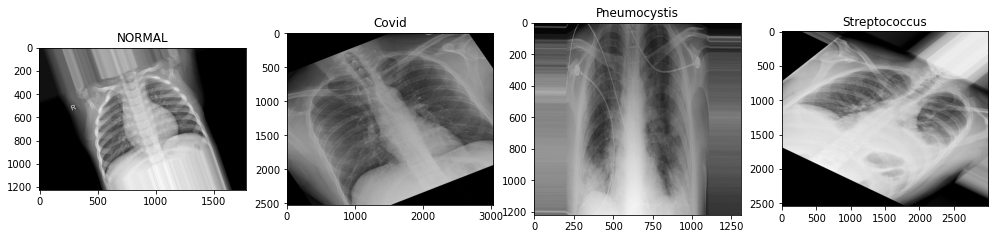

In [ ]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc

img_name = Train_NORMAL[0]
img_normal = load_img(path_data+'/Train/NORMAL/' + img_name)

img_name_1 = Train_Covid[0]
img_Covid = load_img(path_data+'/Train/COVID/' + img_name_1)

img_name_2 = Train_Pneumocystis[0]
img_Pneumocystis = load_img(path_data+'/Train/Pneumocystis/' + img_name_2)

img_name_3 = Train_Streptococcus[1]
img_Streptococcus = load_img(path_data+'/Train/Streptococcus/' + img_name_3)



fig, axs = plt.subplots(1,4,figsize=(17,10))
axs[0].imshow(img_normal)
axs[0].set_title("NORMAL")

axs[1].imshow(img_Covid)
axs[1].set_title("Covid");


axs[2].imshow(img_Pneumocystis)
axs[2].set_title("Pneumocystis")

axs[3].imshow(img_Streptococcus)
axs[3].set_title("Streptococcus");


# plt.savefig("../Assets/plot_01_assets_1_4classes_second_app.png")

In [ ]:
model = Sequential()
activ = 'relu'

model.add(Conv2D(32, kernel_size=(3,3),
                 activation=activ,
                 input_shape=(224,224,3)))
model.add(BatchNormalization())


model.add(Conv2D(64, kernel_size=(3,3),
                 activation=activ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))



model.add(Conv2D(64, kernel_size=(3,3),
                 activation=activ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


# model.add(Conv2D(64, kernel_size=(3,3),
#                  activation=activ))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))



# model.add(Conv2D(128, kernel_size=(3,3),
#                  activation=activ))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))



model.add(Flatten())
model.add(Dense(64, activation=activ))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


In [ ]:
mtr_list = ['accuracy']

In [ ]:
opt = keras.optimizers.RMSprop(
      learning_rate=0.001,
      rho=0.9,
      momentum=0.0,
      epsilon=1e-07,
      centered=False,
      name="RMSprop")

In [ ]:
# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=opt, 
#               metrics=mtr_list)


model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 222, 222, 32)      128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 220, 220, 64)      256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 108, 108, 64)     

Data was augmented before. Therefore I just apply rescaling function.

In [ ]:
# train_datagen = image.ImageDataGenerator(
#                 featurewise_center=False, samplewise_center=False,
#                 featurewise_std_normalization=False, samplewise_std_normalization=False,
#                 zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
#                 height_shift_range=0.0, brightness_range=None, shear_range=0.2, zoom_range=0.2,
#                 channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
#                 horizontal_flip=True, vertical_flip=False, rescale=1./255,
#                 preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)

In [ ]:
train_datagen = image.ImageDataGenerator(rescale=1./255)

In [ ]:
val_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
                    directory=path_data+'/Train/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="categorical",
                    batch_size=32,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")

Found 1925 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'COVID': 0, 'NORMAL': 1, 'Pneumocystis': 2, 'Streptococcus': 3}

In [ ]:
validation_generator = val_dataset.flow_from_directory(
                    directory=path_data+'/val/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="categorical",
                    batch_size=32,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")

Found 526 images belonging to 4 classes.


In [ ]:
classes = pd.DataFrame(train_generator.classes)
classes[0].value_counts(normalize=True)

1    0.258182
2    0.253506
3    0.246753
0    0.241558
Name: 0, dtype: float64

In [ ]:
save_filepath = "model_epoch_{epoch:02d}_loss_{loss:.2f}_acc_{accuracy:.2f}_val_acc_{val_accuracy:.2f}_.h5"
checkpoint = ModelCheckpoint(save_filepath, 
                             monitor='val_accuracy', 
                             verbose=1,
                             save_best_only=True, 
                             mode='max', 
                             period=1)

Check out the GPU type.

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Sep 12 18:37:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    32W /  70W |   9052MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# %%time
model_history = model.fit_generator(
                generator=train_generator, 
#                 steps_per_epoch=30, 
                epochs=40, 
                verbose=1, 
                validation_data= validation_generator, 
                validation_steps=2, 
                class_weight=None, 
                max_queue_size=10, 
                workers=1, 
                use_multiprocessing=False,
                shuffle=True, 
                initial_epoch=0,
                callbacks=[checkpoint])

Epoch 1/40
61/61 [==============================] - 65s 1s/step - loss: 1.6090 - accuracy: 0.2847 - val_loss: 103.8130 - val_accuracy: 0.2656

Epoch 00001: val_accuracy improved from -inf to 0.26562, saving model to model_epoch_01_loss_1.61_acc_0.28_val_acc_0.27_.h5
Epoch 2/40
61/61 [==============================] - 62s 1s/step - loss: 0.6501 - accuracy: 0.2769 - val_loss: 92.3566 - val_accuracy: 0.2344

Epoch 00002: val_accuracy did not improve from 0.26562
Epoch 3/40
61/61 [==============================] - 62s 1s/step - loss: 0.6236 - accuracy: 0.3205 - val_loss: 88.5292 - val_accuracy: 0.1562

Epoch 00003: val_accuracy did not improve from 0.26562
Epoch 4/40
61/61 [==============================] - 62s 1s/step - loss: 0.6272 - accuracy: 0.3013 - val_loss: 106.5196 - val_accuracy: 0.2812

Epoch 00004: val_accuracy improved from 0.26562 to 0.28125, saving model to model_epoch_04_loss_0.63_acc_0.30_val_acc_0.28_.h5
Epoch 5/40
61/61 [==============================] - 62s 1s/step - los

len(model_history.history.keys()) 
 4 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


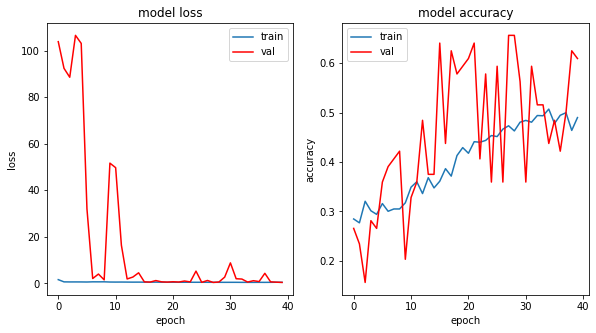

In [ ]:
# list all data in history
print('len(model_history.history.keys()) \n', len(model_history.history.keys()),'\n')
print(model_history.history.keys())


model_history_df = pd.DataFrame(model_history.history)
model_history_df


model_history_df.columns


plt.figure(figsize=(15,17))
# columns = ['loss', 'accuracy', 'mse', 'auc', 'true_positives', 'true_negatives',
#            'false_positives', 'false_negatives']
columns = ['loss', 'accuracy']
# columns = ['loss', 'acc']
for i,col in enumerate(columns):
    
    plt.subplot(3, 3, i+1)
    
    plt.plot(model_history_df[col])
    plt.plot(model_history_df['val_'+col], color='red')
    plt.title('model '+col)
    plt.ylabel(col)
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
plt.savefig("plot_01_1_4classes_balanced_second_app.png")
# plt.savefig("../Figures/plot_01_1_4classes.png")



In [ ]:
path_1 = '/content/model_epoch_14_loss_0.46_acc_0.54_val_acc_0.64_.h5'

model = keras.models.load_model(path_1)

In [ ]:
# DoubleCheck_datagen = image.ImageDataGenerator(
#                 featurewise_center=False, samplewise_center=False,
#                 featurewise_std_normalization=False, samplewise_std_normalization=False,
#                 zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
#                 height_shift_range=0.0, brightness_range=None, shear_range=0.2, zoom_range=0.2,
#                 channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
#                 horizontal_flip=True, vertical_flip=False, rescale=1./255,
#                 preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)

DoubleCheck_datagen = image.ImageDataGenerator(rescale=1./255)
DoubleCheck_generator = DoubleCheck_datagen.flow_from_directory(
                    directory=path_data+'/Test/',
                    # directory='../Dataset_4_classe_second_approach/Train/',
#                     directory='../Codes/Models/Test_Data_Set_Sec_app/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="categorical",
                    batch_size=32,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")


model.evaluate(DoubleCheck_generator)

Found 529 images belonging to 4 classes.
17/17 [==============================] - 15s 860ms/step - loss: 0.4479 - accuracy: 0.5369


[0.4479268491268158, 0.5368620157241821]

In [ ]:
# model.predict_generator(DoubleCheck_generator)

In [ ]:
# est = model.predict_generator(DoubleCheck_generator)
# plt.plot(est)

{'Covid': 0, 'NORMAL': 1, 'Pneumocystis': 2, 'Streptococcus': 3}

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

<Figure size 1440x720 with 0 Axes>

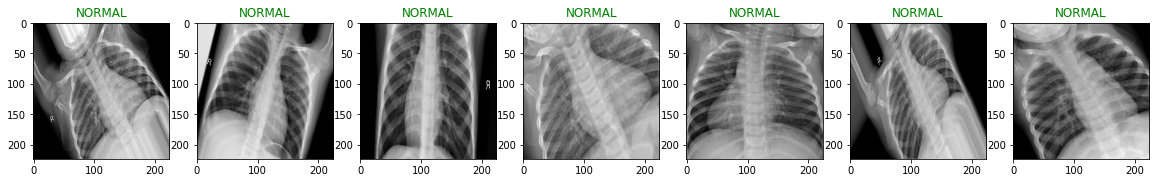

In [ ]:
Normal_img_list = os.listdir(path_data+'/Test/NORMAL/')
Normal_img_list = [i for i in Normal_img_list if i !='.DS_Store']

plt.figure(figsize=(20, 10))

# for i, img in enumerate(Normal_img_list[0:7]):
#     path_to_img = path_data+'/Test//NORMAL/'+str(img)
#     img = load_img(path_to_img, target_size=(224, 224))
#     ax = plt.subplot(1, 7, i+1)
#     plt.imshow(img)
#     plt.title("NORMAL")
    
    
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Normal_img_list[0:7]):
    path_to_img = path_data+'/Test/NORMAL/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)
    if prediction==0:
        plt.title("COVID", color='r')
    elif prediction==1:
        plt.title("NORMAL", color='g')
    elif prediction==2:
        plt.title("Pneumocystis", color='r')
    else:
        plt.title("Streptococcus", color='r')

<Figure size 1440x720 with 0 Axes>

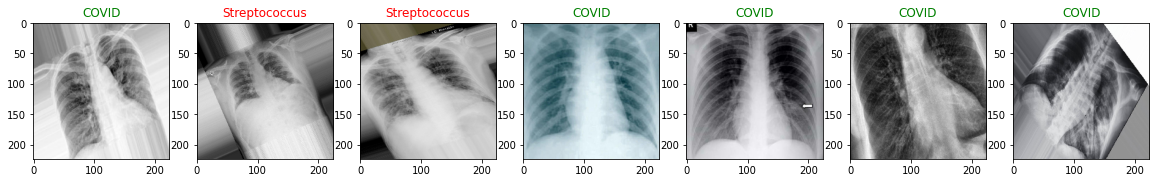

In [ ]:
COVID_img_list = os.listdir(path_data+'/Test/COVID/')
COVID_img_list = [i for i in COVID_img_list if i !='.DS_Store']

# path_to_img = '../Codes/Models/Test_Data_Set/COVID/16669_3_1.jpeg'
plt.figure(figsize=(20, 10))

# for i, img in enumerate(COVID_img_list[0:7]):
#     path_to_img = path_data+'/Test/COVID/'+str(img)
#     img = load_img(path_to_img, target_size=(224, 224))
#     ax = plt.subplot(1, 7, i+1)
#     plt.imshow(img)
#     plt.title("COVID")
    
    
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(COVID_img_list[0:7]):
    path_to_img = path_data+'/Test/COVID/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)

    if prediction==0:
        plt.title("COVID", color='g')
    elif prediction==1:
        plt.title("NORMAL", color='r')
    elif prediction==2:
        plt.title("Pneumocystis", color='r')
    else:
        plt.title("Streptococcus", color='r')

<Figure size 1440x720 with 0 Axes>

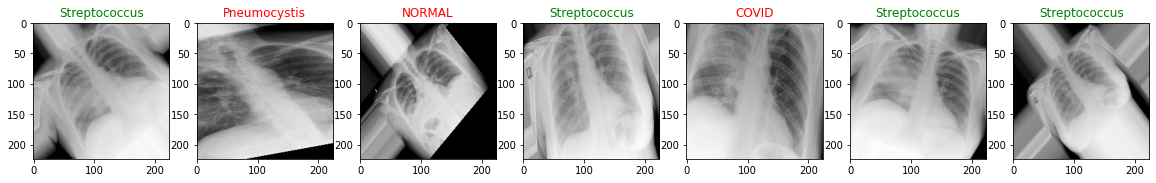

In [ ]:
Streptococcus_img_list = os.listdir(path_data+'/Test/Streptococcus/')
Streptococcus_img_list = [i for i in Streptococcus_img_list if i !='.DS_Store']

# path_to_img = '../Codes/Models/Test_Data_Set/COVID/16669_3_1.jpeg'
plt.figure(figsize=(20, 10))

# for i, img in enumerate(Streptococcus_img_list[0:7]):
#     path_to_img = path_data+'/Test/Streptococcus/'+str(img)
#     img = load_img(path_to_img, target_size=(224, 224))
#     ax = plt.subplot(1, 7, i+1)
#     plt.imshow(img)
#     plt.title("Streptococcus")
    
    
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Streptococcus_img_list[0:7]):
    path_to_img = path_data+'/Test/Streptococcus/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)


    if prediction==0:
        plt.title("COVID", color='r')
    elif prediction==1:
        plt.title("NORMAL", color='r')
    elif prediction==2:
        plt.title("Pneumocystis", color='r')
    else:
        plt.title("Streptococcus", color='g')

<Figure size 1440x720 with 0 Axes>

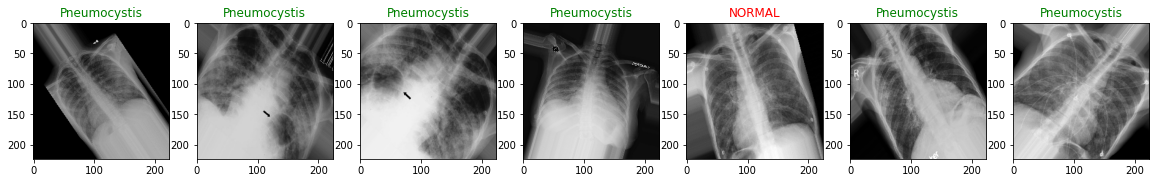

In [ ]:
Pneumocystis_img_list = os.listdir(path_data+'/Test/Pneumocystis/')
Pneumocystis_img_list = [i for i in Pneumocystis_img_list if i !='.DS_Store']

# path_to_img = '../Codes/Models/Test_Data_Set/COVID/16669_3_1.jpeg'
plt.figure(figsize=(20, 10))

# for i, img in enumerate(Pneumocystis_img_list[0:7]):
#     path_to_img = path_data+'/Test/Pneumocystis/'+str(img)
#     img = load_img(path_to_img, target_size=(224, 224))
#     ax = plt.subplot(1, 7, i+1)
#     plt.imshow(img)
#     plt.title("Pneumocystis")
    
    
plt.figure(figsize=(20, 10)) 
for i, img in enumerate(Pneumocystis_img_list[0:7]):
    path_to_img = path_data+'/Test/Pneumocystis/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(img)
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img_batch = np.expand_dims(img, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    # Generate feature output by predicting on the input image
    # prediction = model.predict_classes(img)
    prediction = model.predict(img_preprocessed)
    # print(prediction)
    # print(np.argmax(prediction,axis=1))
    prediction = np.argmax(prediction,axis=1)
    # print(prediction)


    if prediction==0:
        plt.title("COVID", color='r')
    elif prediction==1:
        plt.title("NORMAL", color='r')
    elif prediction==2:
        plt.title("Pneumocystis", color='g')
    else:
        plt.title("Streptococcus", color='r')

The CNN model can successfully detect almost 80% of classes.